Importing Libraries and Modules

In [420]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import DMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder as le

Data Analysis

In [421]:
# Importing dataset
data = pd.read_csv('payment-practices.csv',parse_dates=True)
data['Start date'] = pd.to_datetime(data['Start date'], format='mixed')
data = data[data['Start date'].dt.year<2021]

In [422]:
data.head()

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
0,2,2017-04-29,28-10-2017,07-11-2017,MEDTRONIC LIMITED,1070807,NaN,25.0,77.0,20.0,...,60.0,60.0,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...
1,3,2017-01-05,31-10-2017,08-11-2017,SEBDEN STEEL SERVICE CENTRES LIMITED,2553464,NaN,69.0,7.0,28.0,...,NaN,75.0,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
2,4,2017-04-15,14-10-2017,08-11-2017,GREENERGY FLEXIGRID LIMITED,7581532,NaN,21.0,89.0,9.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
3,5,2017-04-15,14-10-2017,08-11-2017,GREENERGY FUELS LIMITED,4058825,NaN,14.0,90.0,8.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
4,6,2017-04-15,14-10-2017,08-11-2017,GREENERGY INTERNATIONAL LIMITED,2809935,NaN,15.0,96.0,2.0,...,30.0,30.0,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...


In [423]:
data.describe()

,Report Id,Start date,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period
count,45473.000000,45473,41140.000000,41140.000000,41140.000000,41140.000000,41225.000000,41225.000000,27332.000000,41225.000000
mean,23531.478482,2018-11-23 14:02:32.160622848,37.203209,54.668474,30.871925,14.452066,29.374700,20.926040,70.842675,74.137732
min,2.000000,1918-12-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11690.000000,2018-01-07 00:00:00,25.000000,30.000000,14.000000,3.000000,10.000000,1.000000,60.000000,45.000000
50%,23357.000000,2019-01-04 00:00:00,35.000000,56.000000,29.000000,8.000000,24.000000,15.000000,60.000000,60.000000
75%,34934.000000,2020-01-01 00:00:00,47.000000,79.000000,45.000000,19.000000,44.000000,30.000000,90.000000,90.000000
max,78385.000000,2020-12-31 00:00:00,1000.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,1264.000000,5475.000000
std,13927.556907,NaN,23.469359,28.385696,20.556259,16.960962,24.267905,23.064299,47.048621,91.821701


In [424]:
data.describe(exclude=np.number)

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
count,45473,45473,45473,45473,45473,33260,41225,1114,45473,41225,41225,41225,41225,45473
unique,NaN,529,1273,8856,8447,2,2,2,2,2,2,2,2,45473
top,NaN,30-06-2019,30-07-2018,MS INTERNATIONAL PLC,653735,True,False,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
freq,NaN,4463,1129,14,14,33175,40111,850,41198,31214,38402,40850,40981,1
mean,2018-11-23 14:02:32.160622848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1918-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2018-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45473 entries, 0 to 76961
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Report Id                                              45473 non-null  int64         
 1   Start date                                             45473 non-null  datetime64[ns]
 2   End date                                               45473 non-null  object        
 3   Filing date                                            45473 non-null  object        
 4   Company                                                45473 non-null  object        
 5   Company number                                         45473 non-null  object        
 6   Payments made in the reporting period                  33260 non-null  object        
 7   Average time to pay                                    41140 non-null  f

In [426]:
# Dropping the unnecesary Columns
data.drop(columns=['Report Id','Start date', 'End date', 'Filing date', 'Company',
       'Company number','URL'],axis=1,inplace=True)

Handling Missing Data

In [427]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,12213,26.857696
Average time to pay,4333,9.528731
% Invoices paid within 30 days,4333,9.528731
% Invoices paid between 31 and 60 days,4333,9.528731
% Invoices paid later than 60 days,4333,9.528731
% Invoices not paid within agreed terms,4248,9.341807
Shortest (or only) standard payment period,4248,9.341807
Longest standard payment period,18141,39.894003
Maximum contractual payment period,4248,9.341807
Payment terms have changed,4248,9.341807


In [428]:
# Dropping records with higher missing Feature Values
#data.dropna(subset=['Average time to pay'],inplace=True)

In [429]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,12213,26.857696
Average time to pay,4333,9.528731
% Invoices paid within 30 days,4333,9.528731
% Invoices paid between 31 and 60 days,4333,9.528731
% Invoices paid later than 60 days,4333,9.528731
% Invoices not paid within agreed terms,4248,9.341807
Shortest (or only) standard payment period,4248,9.341807
Longest standard payment period,18141,39.894003
Maximum contractual payment period,4248,9.341807
Payment terms have changed,4248,9.341807


In [430]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object','bool']).columns
missing_data_cols = [i for i in categorical_features if data[i].isnull().sum() > 0]
non_missing_cat = [i for i in categorical_features if i not in missing_data_cols]
non_missing_cat

['Participates in payment codes']

In [431]:
# Coverting the object to boolean format
for i in non_missing_cat:
    data = data.astype({i:'bool'})

Handling Continuous Variables

In [432]:
# Imputing the Continuous missing values with Mean
for var in numerical_features:
    data.fillna({var:data[var].mean()}, inplace=True)

In [433]:
for column in missing_data_cols:
    data[column] = data[column].fillna(np.nan)

In [434]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,12213,26.857696
Average time to pay,0,0.000000
% Invoices paid within 30 days,0,0.000000
% Invoices paid between 31 and 60 days,0,0.000000
% Invoices paid later than 60 days,0,0.000000
% Invoices not paid within agreed terms,0,0.000000
Shortest (or only) standard payment period,0,0.000000
Longest standard payment period,0,0.000000
Maximum contractual payment period,0,0.000000
Payment terms have changed,4248,9.341807


Handling categorical missing values

In [435]:
for col in missing_data_cols:
    data_complete = data.drop(columns=missing_data_cols,axis=1)
    data_complete[col] = data[col]
    data_incomplete = data_complete[data_complete.isnull().any(axis=1)]
    data_complete.dropna(inplace=True)
    data_complete = data_complete.astype({col:'bool'})
    X_train = data_complete.drop(columns=[col])
    y_train = data_complete[col]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predicted_values = model.predict(data_incomplete.drop(columns=[col]))
    data_incomplete[col] = predicted_values
    data.update(data_incomplete)

In [436]:
le = le()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

In [437]:
data.dtypes

Payments made in the reporting period                      int32
Average time to pay                                      float64
% Invoices paid within 30 days                           float64
% Invoices paid between 31 and 60 days                   float64
% Invoices paid later than 60 days                       float64
% Invoices not paid within agreed terms                  float64
Shortest (or only) standard payment period               float64
Longest standard payment period                          float64
Maximum contractual payment period                       float64
Payment terms have changed                                 int32
Suppliers notified of changes                              int32
Participates in payment codes                              int64
E-Invoicing offered                                        int32
Supply-chain financing offered                             int32
Policy covers charges for remaining on supplier list       int32
Charges have been made fo

In [438]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,0,0.0
Average time to pay,0,0.0
% Invoices paid within 30 days,0,0.0
% Invoices paid between 31 and 60 days,0,0.0
% Invoices paid later than 60 days,0,0.0
% Invoices not paid within agreed terms,0,0.0
Shortest (or only) standard payment period,0,0.0
Longest standard payment period,0,0.0
Maximum contractual payment period,0,0.0
Payment terms have changed,0,0.0


EDA

In [439]:
# Finding 80th Quantile
percentile_80 = np.percentile(data['% Invoices not paid within agreed terms'].dropna(), 80)
print('80th Quantile = ',percentile_80)

80th Quantile =  47.0


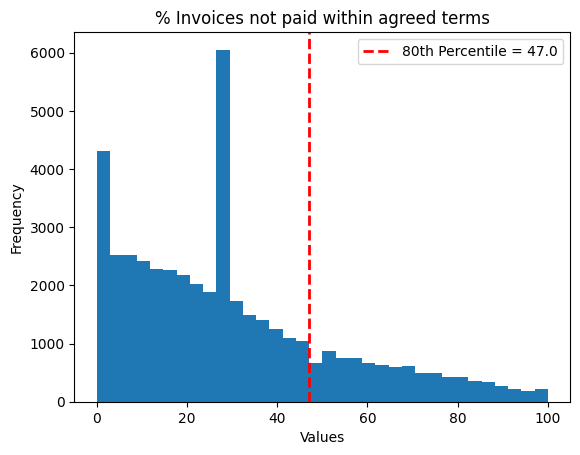

In [440]:
# Plotting the histogram with the 80th Quantile
plt.hist(data['% Invoices not paid within agreed terms'],bins=34)
plt.axvline(x=percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile = '+str(percentile_80))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% Invoices not paid within agreed terms')

# Show the plot
plt.legend()
plt.show()

Creating Flag Variable

In [441]:
# creating target variable using '% Invoices not paid within agreed terms' feature
data['flag'] = 0
data.loc[data['% Invoices not paid within agreed terms'] > percentile_80, 'flag'] = 1
data.drop(columns=['% Invoices not paid within agreed terms'],inplace=True)

<Axes: >

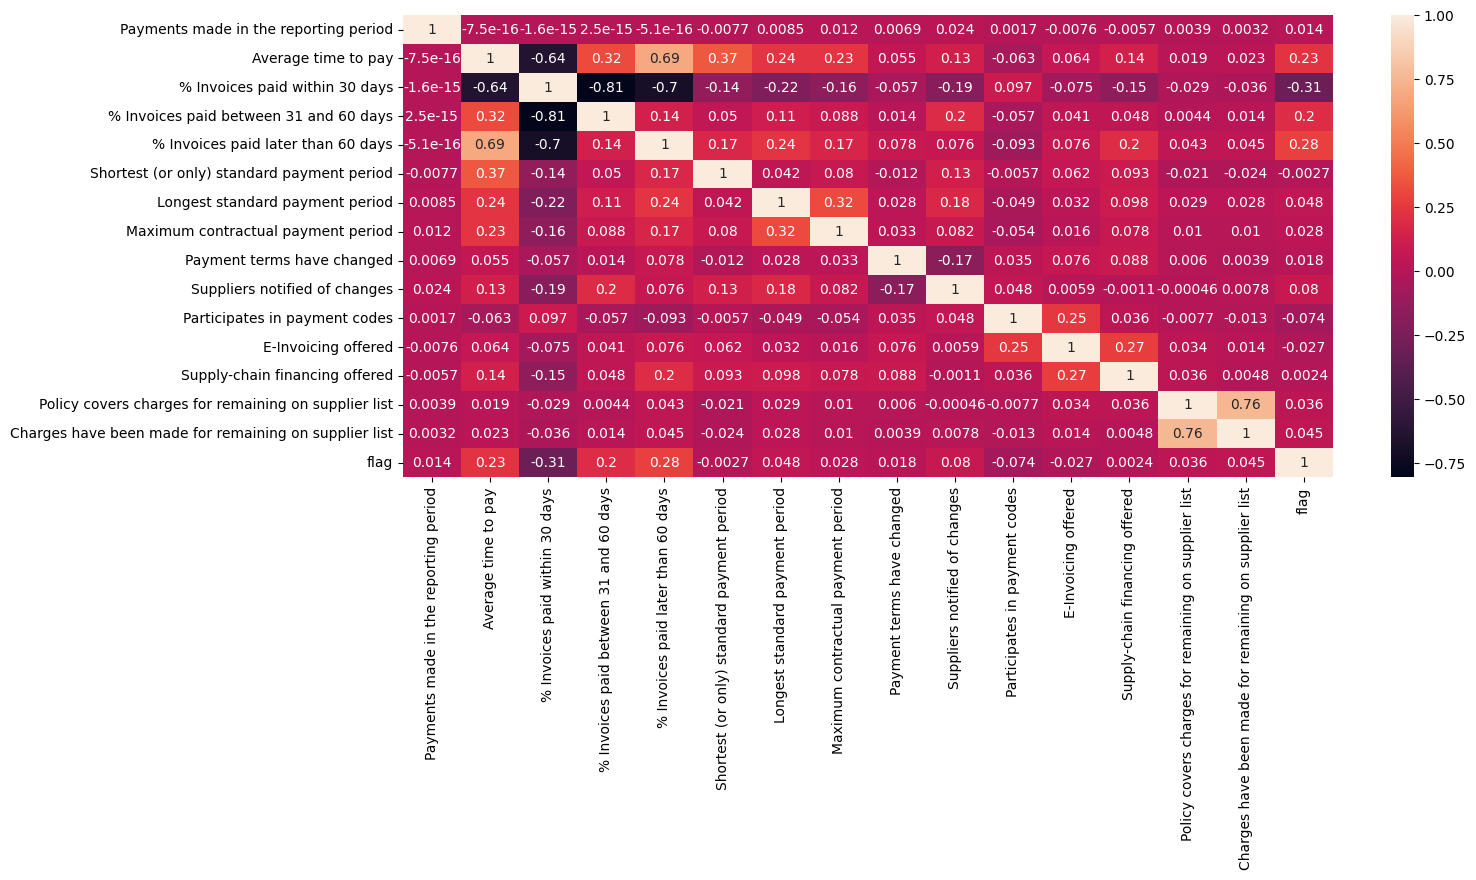

In [442]:
# Correlation Analysis
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(),annot=True)

In [443]:
# Dropping the Highly correlated Features
data1 = data.drop(columns=['% Invoices paid within 30 days',
                            '% Invoices paid later than 60 days',
                            'Suppliers notified of changes',
                            'Policy covers charges for remaining on supplier list'])

Random Oversampling

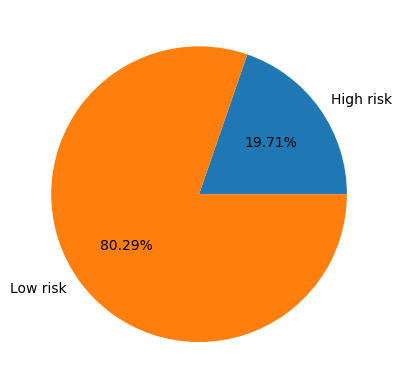

In [444]:
# Calculate the percentage of high risk and low risk samples before Oversampling
high_risk_percentage = round((data['flag'].value_counts()[1] / data.shape[0]) * 100, 2)
low_risk_percentage = round((data['flag'].value_counts()[0] / data.shape[0]) * 100, 2)

plt.pie([high_risk_percentage,low_risk_percentage],labels=['High risk','Low risk'],autopct="%1.2f%%")
plt.show()

In [445]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Separate the features and target
X = data1.drop('flag', axis=1)
y = data1['flag']

# Oversample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the new class distribution
print(f"New class distribution: {y_resampled.value_counts(normalize=True)}")

New class distribution: flag
1    0.5
0    0.5
Name: proportion, dtype: float64


In [446]:
data1 = pd.DataFrame(X_resampled, columns=X.columns)  # Use original feature names
data1["flag"] = y_resampled  # Add target variable
data1 = data1.sample(frac=1, random_state=42)  # Set random state for reproducibility

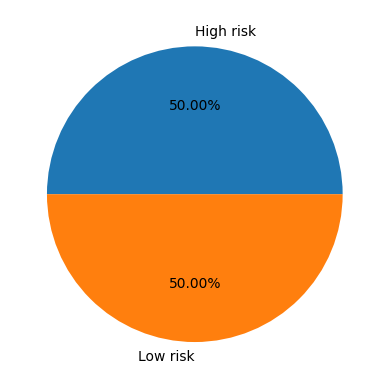

In [447]:
# Calculate the percentage of high risk and low risk samples after Oversampling
high_risk_percentage = round((y_resampled.value_counts()[1] / data1.shape[0]) * 100, 2)
low_risk_percentage = round((y_resampled.value_counts()[0] / data1.shape[0]) * 100, 2)

plt.pie([high_risk_percentage,low_risk_percentage],labels=['High risk','Low risk'],autopct="%1.2f%%")
plt.show()

Splitting data

In [448]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop('flag', axis=1), data1['flag'], test_size=0.3, random_state=42
)

**Implementing XGBoost**

In [449]:
import xgboost as xgb

# Create DMatrixes with categorical features handling
dtrain = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test ,enable_categorical=True)

# Set hyperparameters (including categorical support)
params = {
    'objective': 'binary:logistic',
    'n_estimators': 900,
    'learning_rate': 0.01,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.85,
    'enable_categorical': True
}  # Ensure enable_categorical is True

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions and convert to binary labels
xgb_pred = bst.predict(dtest)
xgb_pred_bin = np.where(xgb_pred > 0.5, 1, 0)  # Use np.where for clarity

# Evaluate accuracy
accuracy = accuracy_score(y_test, xgb_pred_bin)
print('Accuracy:', accuracy)


Accuracy: 0.7733601132058247


**Implementing Random Forest**

In [450]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9121


In [451]:
from sklearn.metrics import classification_report,f1_score,auc
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11031
           1       0.87      0.97      0.92     10876

    accuracy                           0.91     21907
   macro avg       0.92      0.91      0.91     21907
weighted avg       0.92      0.91      0.91     21907



**Implementing GBDT**

In [452]:
import pandas as pd
import numpy as np

def generate_data(n_samples=50):
    x_max, x_min = 1.4, -1.4
    len_x = x_max - x_min
    x = np.random.rand(n_samples) * len_x - len_x / 2
    noise = np.random.randn(n_samples) * 0.3
    y = x**3 - 0.5 * x**2 + noise
    data_train = pd.DataFrame(x, columns=["Feature"])
    return data_train, y

data_train, target_train = generate_data()


In [453]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 100,  # Number of boosting stages
    "learning_rate": 0.1,  # Shrinkage parameter
    "max_depth": 3,  # Maximum depth of individual trees
    "random_state": 0  # Random seed for reproducibility
}

reg = GradientBoostingRegressor(**params)
reg.fit(data_train, target_train)


GradientBoostingRegressor(random_state=0)

In [454]:
from sklearn.metrics import mean_squared_error

target_train_predicted = reg.predict(data_train)
mse = mean_squared_error(target_train, target_train_predicted)
print(f"The mean squared error (MSE) on the training set: {mse:.4f}")


The mean squared error (MSE) on the training set: 0.0077
